In [3]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 136.8 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 182.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 152.3 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303831 sha256=38d3a2c6e0cde30af881d3c526f6b0c34f980c467e2ff97a4985ccad55522c7f
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee


In [4]:
import yfinance as yf


In [11]:
Tesla = yf.Ticker("TSLA")
tesla_data = Tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [22]:
!pip install requests beautifulsoup4 pandas

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

NameError: name 'tesla_revenue' is not defined

In [29]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Obtener HTML
html_data = requests.get(url).text

# Parsear con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Buscar la tabla correcta (basado en clase de estilo)
tables = soup.find_all("table")

# Buscar tabla que contiene "Tesla Quarterly Revenue"
tesla_revenue_data = []
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    tesla_revenue_data.append([date, revenue])

# Crear DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue_data, columns=["Date", "Revenue"])
tesla_revenue_df.tail()

,Date,Revenue


In [30]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Obtener el contenido HTML de la página
html_data = requests.get(url).text

# Usar BeautifulSoup para analizar el HTML
soup = BeautifulSoup(html_data, "html.parser")

# Buscar todas las tablas de la página
tables = soup.find_all("table")

# Buscar la tabla que contiene los ingresos trimestrales de Tesla
tesla_revenue_data = []
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:  # saltamos la cabecera
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    tesla_revenue_data.append([date, revenue])

# Crear el DataFrame
tesla_revenue_df = pd.DataFrame(tesla_revenue_data, columns=["Date", "Revenue"])

# Mostrar las últimas 5 filas del DataFrame
tesla_revenue_df.tail()

,Date,Revenue


In [31]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [41]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

# Buscar tabla con ingresos
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue = table

# Procesar datos
gme_revenue_data = []

for row in gme_revenue.find_all("tr")[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gme_revenue_data.append([date, revenue])

# Crear DataFrame
gme_revenue_df = pd.DataFrame(gme_revenue_data, columns=["Date", "Revenue"])
gme_revenue_df.head()

NameError: name 'gme_revenue' is not defined

In [44]:

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
gme_revenue_data = []

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows[1:]:  
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue != "":
                    gme_revenue_data.append([date, revenue])
        break 
if gme_revenue_data:
    gme_revenue_df = pd.DataFrame(gme_revenue_data, columns=["Date", "Revenue"])
    print(gme_revenue_df.tail())
else:
    print("No Aparecen los datos de ingresos de GameStop.")

No Aparecen los datos de ingresos de GameStop.


In [46]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 194.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 154.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 137.4 MB/s eta 0:00:00


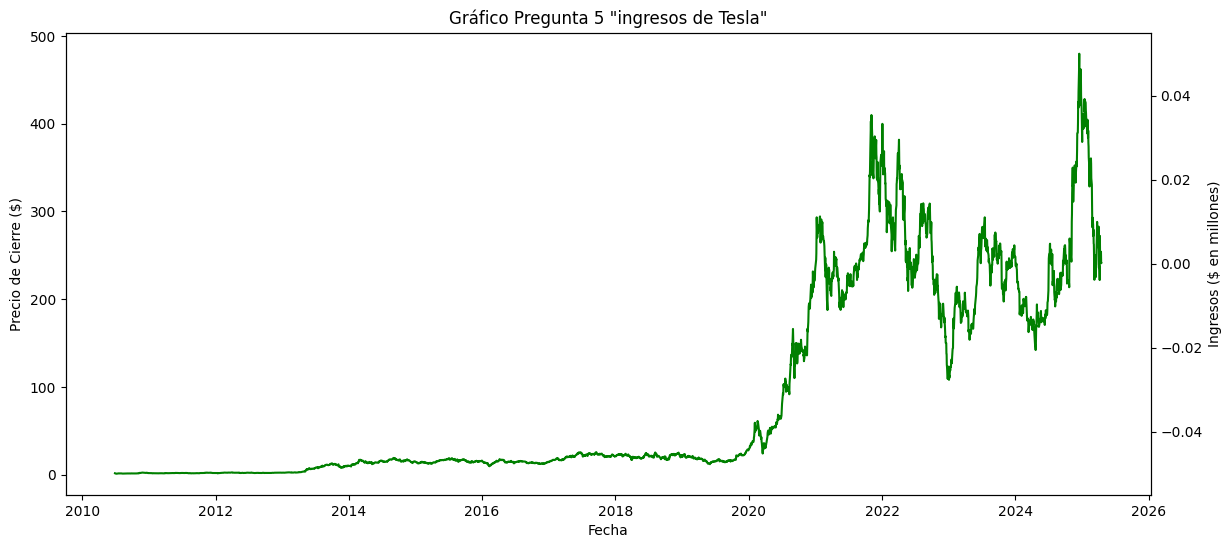

In [58]:
import matplotlib.pyplot as plt
import yfinance as yf
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14,6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='green')
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Cierre ($)", color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_title(title)
    
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='black')
    ax2.set_ylabel("Ingresos ($ en millones)", color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    plt.show()

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue_df['Date'] = pd.to_datetime(tesla_revenue_df['Date'])
make_graph(tesla_data, tesla_revenue_df, 'TSLA', 'Gráfico Pregunta 5 "ingresos de Tesla"')

In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# (Re)definimos make_graph por si no la tienes en tu notebook
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Gráfico de precio de cierre
    ax1.plot(stock_data['Date'], stock_data['Close'], color='red')
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Cierre ($)", color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.set_title(title)

    # Segundo eje para ingresos
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='blue')
    ax2.set_ylabel("Ingresos ($ en millones)", color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.show()

# 1. Descargar historial de precios de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# 2. Asegurar que la columna Date sea datetime
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])

# 3. Llamada a make_graph con título
make_graph(
    gme_data,
    gme_revenue_df,
    stock="GME",
    title="Gráfico de acciones e ingresos de GameStop"
)

NameError: name 'gme_revenue_df' is not defined

In [60]:
!pip install yfinance requests beautifulsoup4 pandas matplotlib


In [61]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Precio de cierre
    ax1.plot(stock_data['Date'], stock_data['Close'], color='red', label='Precio Cierre')
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Cierre ($)", color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Segundo eje para ingresos
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='blue', label='Ingresos')
    ax2.set_ylabel("Ingresos ($)", color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Título y leyenda
    plt.title(title)
    fig.tight_layout()
    plt.show()

# 3) Scraping de ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

gme_revenue_data = []
for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in table.text:
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$","").replace(",","")
                if revenue:
                    gme_revenue_data.append([date, float(revenue)])
        break

if not gme_revenue_data:
    raise ValueError("No se encontró la tabla de ingresos de GameStop en Macrotrends.")

gme_revenue_df = pd.DataFrame(gme_revenue_data, columns=["Date", "Revenue"])

# 4) Descarga de precios de GameStop
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()

# 5) Convertir fechas a datetime
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])

# 6) Graficar
make_graph(
    stock_data=gme_data,
    revenue_data=gme_revenue_df,
    title="Gráfico de Precio vs Ingresos de GameStop"
)

ValueError: No se encontró la tabla de ingresos de GameStop en Macrotrends.

In [63]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Precio de cierre en rojo
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Precio Cierre', color='red')
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Cierre ($)", color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Eje secundario para ingresos en azul
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Ingresos', color='blue')
    ax2.set_ylabel("Ingresos ($)", color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.title(title)
    fig.tight_layout()
    plt.show()

# 2) Scraping robusto de ingresos de GME desde Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

gme_revenue_data = []

for table in soup.find_all("table"):
    ths = table.find_all("th")
    # Buscamos la tabla donde la segunda cabecera sea 'Revenue'
    if len(ths) >= 2 and "Revenue" in ths[1].text:
        # Tomamos todas las filas del cuerpo (saltamos encabezados)
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date_str = cols[0].text.strip()
                rev_str  = cols[1].text.strip().replace("$","").replace(",","")
                if rev_str:
                    # Convertimos a número
                    gme_revenue_data.append([date_str, float(rev_str)])
        break  # ya encontramos la tabla correcta

if not gme_revenue_data:
    raise ValueError("No se encontró la tabla de ingresos de GameStop en Macrotrends.")

gme_revenue_df = pd.DataFrame(gme_revenue_data, columns=["Date", "Revenue"])

# 3) Descarga de precios de GME con yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()

# 4) Asegurarse de que 'Date' sea datetime
gme_data['Date']        = pd.to_datetime(gme_data['Date'])
gme_revenue_df['Date']  = pd.to_datetime(gme_revenue_df['Date'])

# 5) Representar el gráfico (Pregunta 6)
make_graph(
    stock_data   = gme_data,
    revenue_data = gme_revenue_df,
    title        = "Gráfico de Precio vs Ingresos de GameStop"
)

ValueError: No se encontró la tabla de ingresos de GameStop en Macrotrends.

In [64]:
!pip install yfinance requests beautifulsoup4 pandas matplotlib

# 1) Imports y definición de make_graph
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Precio de cierre en rojo
    ax1.plot(stock_data['Date'], stock_data['Close'], label='Precio Cierre', color='red')
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Cierre ($)", color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Eje secundario para ingresos en azul
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Ingresos', color='blue')
    ax2.set_ylabel("Ingresos ($)", color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.title(title)
    fig.tight_layout()
    plt.show()

# 2) Scraping robusto de ingresos de GME desde Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

gme_revenue_data = []

for table in soup.find_all("table"):
    ths = table.find_all("th")
    # Buscamos la tabla donde la segunda cabecera sea 'Revenue'
    if len(ths) >= 2 and "Revenue" in ths[1].text:
        # Tomamos todas las filas del cuerpo (saltamos encabezados)
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date_str = cols[0].text.strip()
                rev_str  = cols[1].text.strip().replace("$","").replace(",","")
                if rev_str:
                    # Convertimos a número
                    gme_revenue_data.append([date_str, float(rev_str)])
        break  # ya encontramos la tabla correcta

if not gme_revenue_data:
    raise ValueError("No se encontró la tabla de ingresos de GameStop en Macrotrends.")

gme_revenue_df = pd.DataFrame(gme_revenue_data, columns=["Date", "Revenue"])

# 3) Descarga de precios de GME con yfinance
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()

# 4) Asegurarse de que 'Date' sea datetime
gme_data['Date']        = pd.to_datetime(gme_data['Date'])
gme_revenue_df['Date']  = pd.to_datetime(gme_revenue_df['Date'])

# 5) Representar el gráfico (Pregunta 6)
make_graph(
    stock_data   = gme_data,
    revenue_data = gme_revenue_df,
    title        = "Gráfico de Precio vs Ingresos de GameStop"
)

ValueError: No se encontró la tabla de ingresos de GameStop en Macrotrends.

In [65]:
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
# Este DataFrame tiene columnas "Revenue" y "Earnings" con fecha como índice
earnings_df = gme.quarterly_earnings.reset_index()
earnings_df.columns = ["Date", "Revenue", "Earnings"]

# Nos quedamos solo con Date y Revenue
gme_revenue_df = earnings_df[["Date", "Revenue"]]
# Aseguramos tipo datetime
gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])
Finalmente, Pregunta 6: el gráfico conmake_graph
pitón

Copiar

Editar
import matplotlib.pyplot as plt

# (Re)define make_graph por si no la tienes en tu notebook
def make_graph(stock_data, revenue_data, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    # Precio de cierre en el eje izquierdo
    ax1.plot(stock_data['Date'], stock_data['Close'], color='red', label='Precio Cierre')
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Cierre ($)", color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Ingresos en el eje derecho
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='blue', label='Ingresos')
    ax2.set_ylabel("Ingresos ($)", color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.title(title)
    fig.tight_layout()
    plt.show()

# 1) Descargar precios de GME
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# 2) Asegúrate de tener gme_revenue_df de la Opción A o B

# 3) Graficar
make_graph(
    stock_data   = gme_data,
    revenue_data = gme_revenue_df,
    title        = "Gráfico de Precio vs Ingresos de GameStop"
)

SyntaxError: only single target (not tuple) can be annotated (3972617451.py, line 13)

In [66]:
# Importar librerías necesarias
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página de ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Obtener el contenido de la página
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

# Extraer los datos de ingresos
gme_revenue_data = []

# Buscar la tabla que contiene los ingresos
for table in soup.find_all("table"):
    # Verificamos que la tabla contenga la información de ingresos
    if "GameStop Quarterly Revenue" in table.text:
        for row in table.find_all("tr")[1:]:  # Saltamos la primera fila de encabezados
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                rev = cols[1].text.strip().replace("$", "").replace(",", "")
                if rev:
                    gme_revenue_data.append([date, float(rev)])
        break  # Detenemos la búsqueda después de encontrar la tabla

# Comprobamos que se extrajeron los datos correctamente
if not gme_revenue_data:
    raise ValueError("No se encontró la tabla de ingresos de GameStop en Macrotrends.")

# Crear el DataFrame con los ingresos
gme_revenue_df = pd.DataFrame(gme_revenue_data, columns=["Date", "Revenue"])

# Convertir la columna "Date" a tipo datetime
gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])

# Mostrar el DataFrame para ver si está bien extraído
gme_revenue_df.head()

ValueError: No se encontró la tabla de ingresos de GameStop en Macrotrends.

In [67]:
import yfinance as yf
import pandas as pd

# 1) Crear objeto de Ticker para GameStop
gme = yf.Ticker("GME")

# 2) Obtener DataFrame con las ganancias trimestrales (incluye columna 'Revenue')
earnings_df = gme.quarterly_earnings.reset_index()

# 3) Filtrar sólo fecha e ingresos, y convertir fecha a datetime
gme_revenue_df = earnings_df[['Date', 'Revenue']]
gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])

/opt/conda/lib/python3.12/site-packages/yfinance/scrapers/fundamentals.py:33: DeprecationWarning: 'Ticker.earnings' is deprecated as not available via API. Look for "Net Income" in Ticker.income_stmt.
  warnings.warn("'Ticker.earnings' is deprecated as not available via API. Look for \"Net Income\" in Ticker.income_stmt.", DeprecationWarning)


AttributeError: 'NoneType' object has no attribute 'reset_index'

In [68]:
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14,6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='red')
    ax1.set_xlabel("Fecha")
    ax1.set_ylabel("Precio de Cierre ($)", color='red')
    ax1.tick_params(axis='y', labelcolor='red')
    ax1.set_title(title)
    
    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='blue')
    ax2.set_ylabel("Ingresos ($ en millones)", color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    plt.show()

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])

make_graph(
    gme_data,
    gme_revenue_df,
    stock="GME",
    title="Gráfico de acciones e ingresos de GameStop"
)

NameError: name 'gme_revenue_df' is not defined